In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

In [7]:
start = '2015-01-07'
end = '2017-01-07'

In [48]:
# Fetch data for United Airlines (UAL)
ual = yf.download("UAL", start=start, end=end,auto_adjust=True)

# Fetch data for American Airlines (AAL)
aal = yf.download("AAL", start=start, end=end,auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
ual.head()

Price,Close,High,Low,Open,Volume
Ticker,UAL,UAL,UAL,UAL,UAL
Date,,,,,
2015-01-07,65.529999,66.110001,64.000000,64.959999,5135000
2015-01-08,66.639999,67.519997,65.410004,65.699997,6889500
2015-01-09,65.339996,66.970001,64.900002,66.760002,3490300
2015-01-12,65.919998,66.849998,63.840000,66.160004,5246500
2015-01-13,66.410004,68.260002,65.449997,66.839996,6261700


In [13]:
aal.head()

Price,Close,High,Low,Open,Volume
Ticker,AAL,AAL,AAL,AAL,AAL
Date,,,,,
2015-01-07,50.227154,50.833559,49.383876,50.577733,10069800
2015-01-08,50.843037,51.430488,50.454560,50.672486,9672100
2015-01-09,49.289127,51.079908,49.099626,50.852506,12351600
2015-01-12,46.977230,48.749061,46.617178,48.379535,18261300
2015-01-13,47.754169,48.730097,46.863514,47.488866,12259300


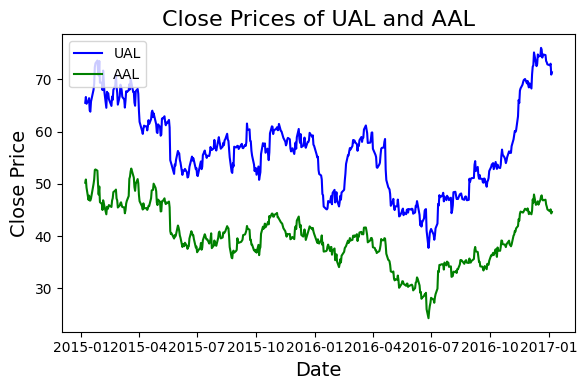

In [17]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot UAL's Close prices
ax.plot(ual['Close'], label='UAL', color='blue')

# Plot AAL's Close prices
ax.plot(aal['Close'], label='AAL', color='green')

# Add title, labels, and legend
ax.set_title("Close Prices of UAL and AAL", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Close Price", fontsize=14)
ax.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
ual = ual.dropna()
aal = aal.dropna()

In [22]:
ual.shape

(505, 5)

In [24]:
aal.shape

(505, 5)

In [33]:
np.corrcoef(aal['Close'],ual['Close'],rowvar=False)

array([[1.        , 0.92135435],
       [0.92135435, 1.        ]])

In [51]:
spread = aal['Close']['AAL'] - ual['Close']['UAL']
spread

Date
2015-01-07   -15.302845
2015-01-08   -15.796963
2015-01-09   -16.050869
2015-01-12   -18.942768
2015-01-13   -18.655834
                ...    
2016-12-30   -27.761898
2017-01-03   -27.968773
2017-01-04   -27.892239
2017-01-05   -26.584972
2017-01-06   -26.715736
Length: 505, dtype: float64

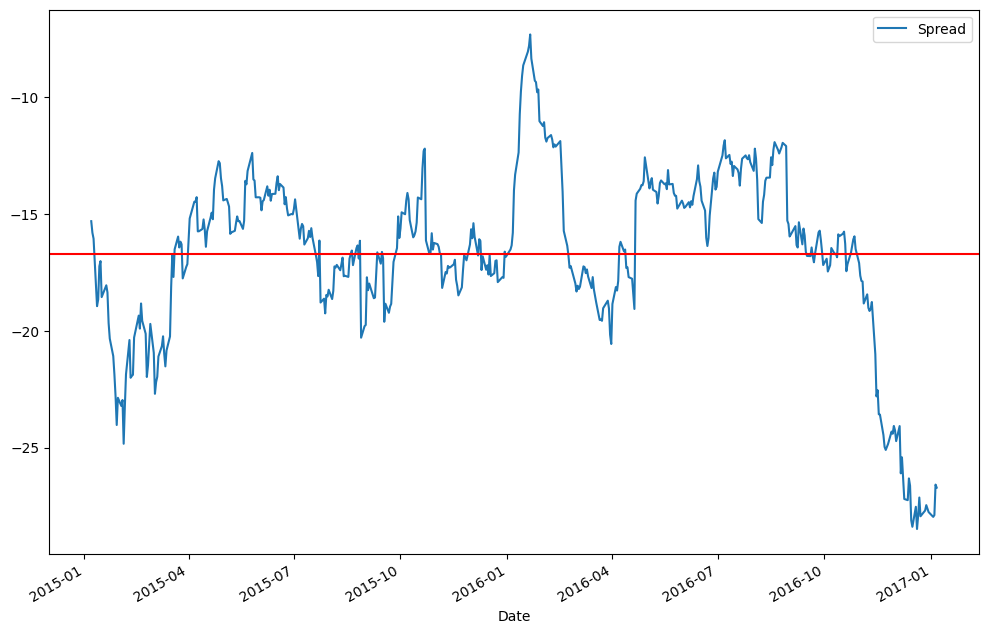

In [52]:
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend()

In [58]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

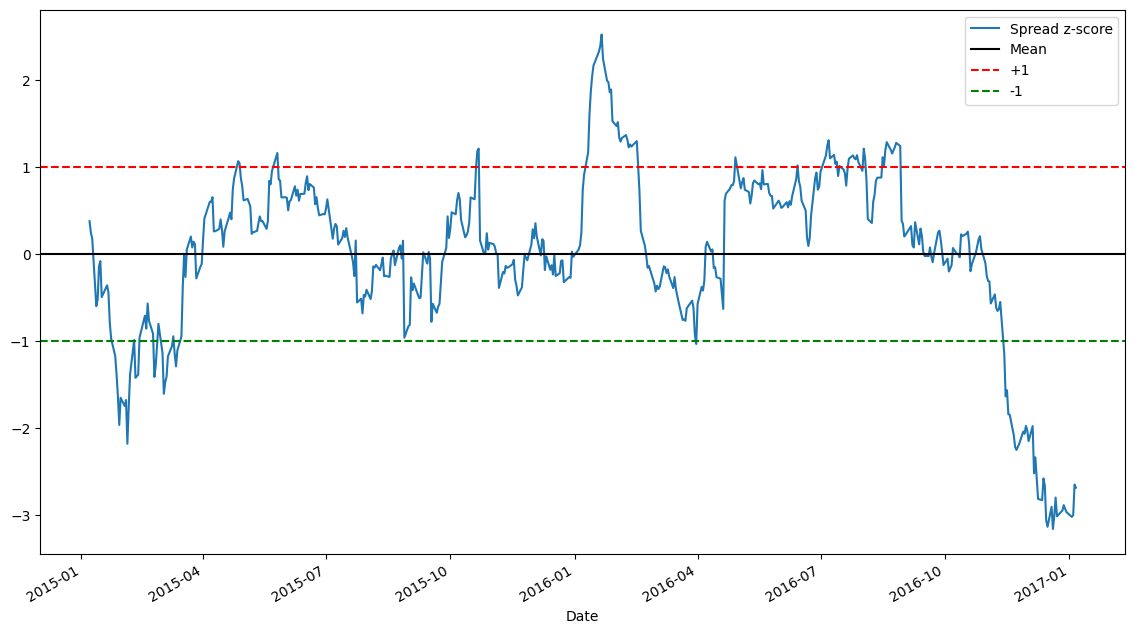

In [59]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

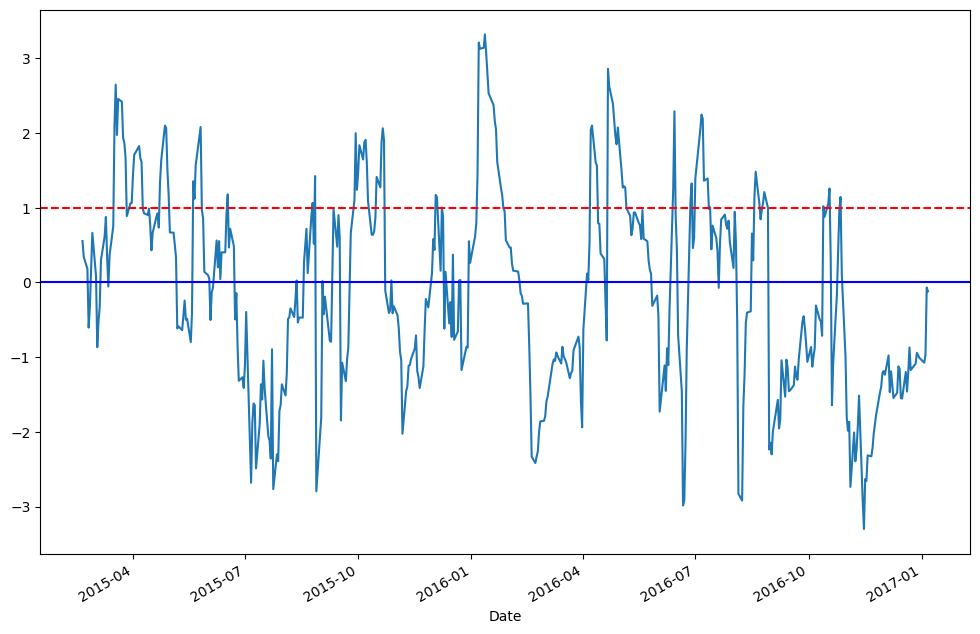

In [61]:
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30
zscore_30_1.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0,color='b')
plt.axhline(1,color='r',ls='--')